In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_blobs

from kmeans import solve

In [4]:
N = 30
K = 3

In [5]:
def get_distance(i, j, df, num_colors):
    x = df.iloc[i, :num_colors].to_numpy()
    y = df.iloc[j, :num_colors].to_numpy()
    return np.linalg.norm(x-y)

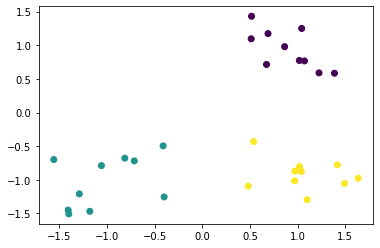

In [6]:
# generate k clusters, classical way
centers = [[1, 1], [-1, -1], [1, -1]]
sz_per_cluster = N//K
ft_dim = 2
stddev = 0.3
output_name = "tmp"
n_samples = len(centers) * sz_per_cluster
x, labels= make_blobs(
    n_samples=n_samples,
    n_features=ft_dim,
    centers=centers,
    cluster_std=stddev
)

df = pd.DataFrame(x, columns=[f"ft_{i}" for i in range(ft_dim)])
df['label']=labels
# print(df)
# print(df.iloc[2,:2].to_numpy())
df.to_csv(output_name+".csv", index=False)

plt.scatter(x[:,0], x[:,1], c=labels)
plt.savefig(output_name+".png", dpi=300)

In [9]:
# Make distance matrix
dist_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            dist_matrix[i][j] = get_distance(i, j, df, num_colors=K)

In [10]:
label_results = solve(
    N, K, dist_matrix
)

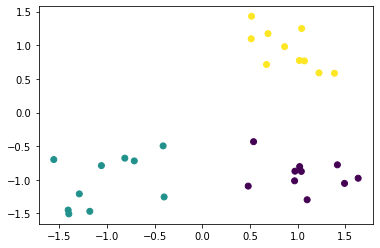

In [11]:
plt.scatter(x[:,0], x[:,1], c=label_results)

In [12]:
Counter(label_results)  # checking if the counts are the same

Counter({1: 10, 2: 10, 0: 10})

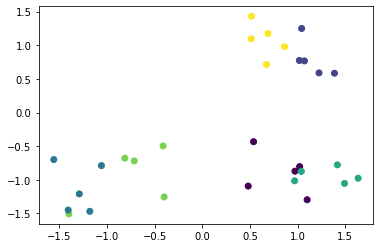

In [13]:
# What if increase K?
new_label_results = solve(
    N, 2*K, dist_matrix
)
plt.scatter(x[:,0], x[:,1], c=new_label_results)